In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def System(r,t):
    
    x,y = r
    dxdt = 2*x - y
    dydt = x + 2*y
    
    return [dxdt,dydt]

In [49]:
t = np.linspace(0,20,10000)

Para esta parte del problema se usó el código de la clase aplicado a este caso:

In [101]:
def IntegratorAdams(f,r,t):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r[0]
    y[0] = r[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])

    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    
    xc = x.copy()
    yc = y.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        y[i] = y[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        yc[i] = y[i]
        
        futuro = np.array([x[i],y[i]])
        K13 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        yc[i] = yc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return x,y,xc,yc

In [102]:
r0 = [0.,0.]
r1 = [1., 0.]
r2 = [-1.,0.]
r3 = [0., 1.]
r4 = [0.,-1.]
r5 = [1., 1.]
r6 = [-1.,-1.]
r7 = [-1., 1.]
r8 = [1.,-1.]

In [103]:
sol0 = IntegratorAdams(System,r0,t)
sol1 = IntegratorAdams(System,r1,t)
sol2 = IntegratorAdams(System,r2,t)
sol3 = IntegratorAdams(System,r3,t)
sol4 = IntegratorAdams(System,r4,t)
sol5 = IntegratorAdams(System,r5,t)
sol6 = IntegratorAdams(System,r6,t)
sol7 = IntegratorAdams(System,r7,t)
sol8 = IntegratorAdams(System,r8,t)

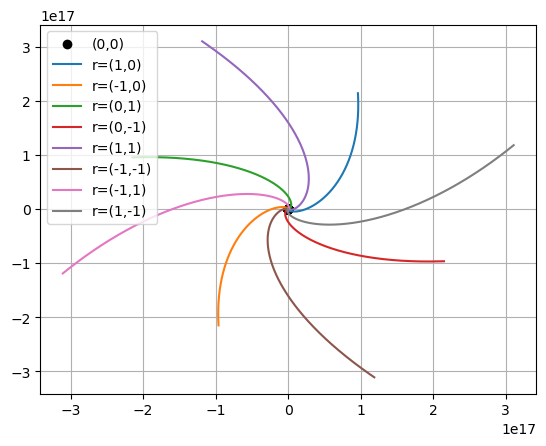

In [104]:
plt.scatter(sol0[2],sol0[3],color="k", label="(0,0)")
plt.plot(sol1[2],sol1[3], label="r=(1,0)")
plt.plot(sol2[2],sol2[3], label="r=(-1,0)")
plt.plot(sol3[2],sol3[3], label="r=(0,1)")
plt.plot(sol4[2],sol4[3], label="r=(0,-1)")
plt.plot(sol5[2],sol5[3], label="r=(1,1)")
plt.plot(sol6[2],sol6[3], label="r=(-1,-1)")
plt.plot(sol7[2],sol7[3], label="r=(-1,1)")
plt.plot(sol8[2],sol8[3], label="r=(1,-1)")
plt.grid()
plt.legend()

In [105]:
print(sol0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))


El punto crítico es el punto (0,0) tal como se puede observar en la gráfica.